In [22]:
#Provide real world examples of structured , semi strurctured and unstructured data , suggest appropriated visualisation techinques for each tylpe and justify your choice
import pandas as pd
import matplotlib.pyplot as plt 
#structured data
data={
    "month":["Janbari","fair-bari","maarch","aap-reel","Mai"],
    "sales":[100,200,300,400,500,]
}
df=pd.DataFrame(data)

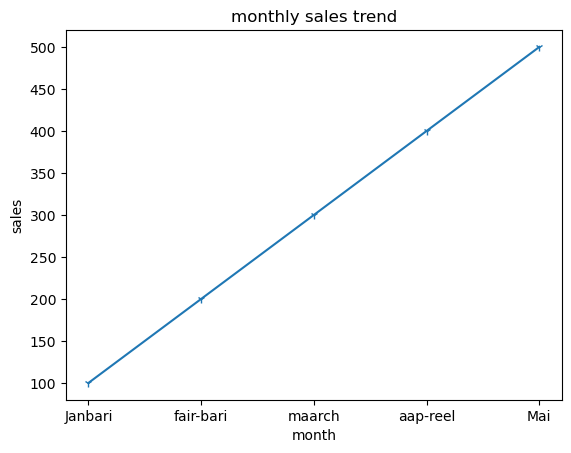

In [24]:
#visualisation line chart
plt.plot(df["month"],df["sales"],marker='1')
plt.title("monthly sales trend")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

Text(0.5, 1.0, 'Monthly sales(Bar chart)')

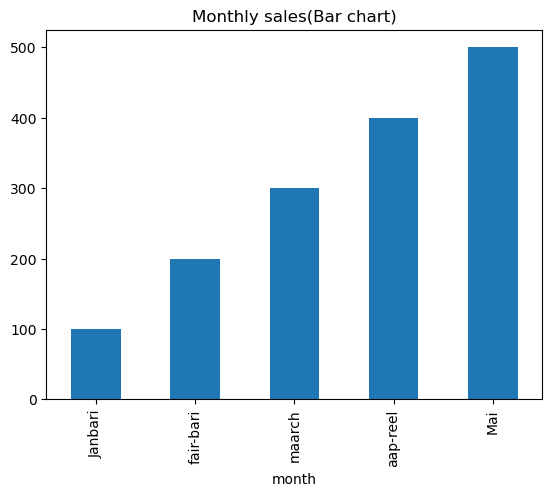

In [26]:
#visualisation - bar chart 
df.plot(x="month",y="sales",kind="bar",legend=False)
plt.title("Monthly sales(Bar chart)")
#plt.show()

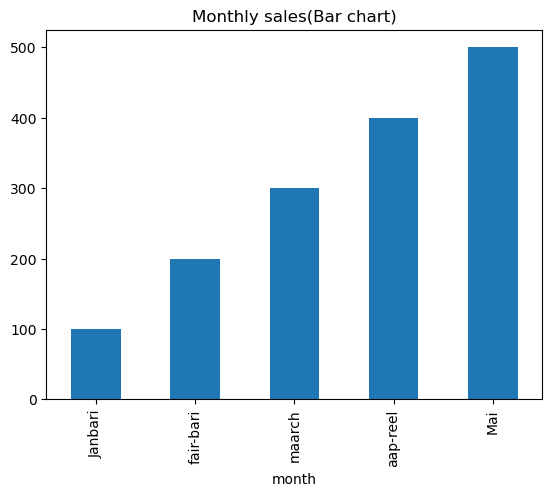

In [28]:
df.plot(x="month",y="sales",kind="bar",legend=False)
plt.title("Monthly sales(Bar chart)")
plt.show()# difference

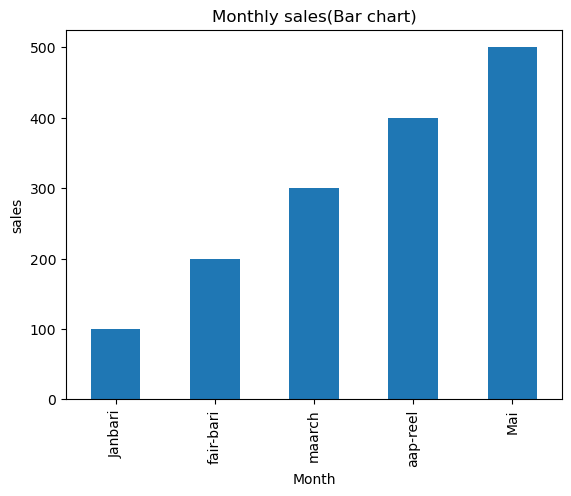

In [30]:
df.plot(x="month",y="sales",kind="bar",legend=False)
plt.title("Monthly sales(Bar chart)")
plt.xlabel("Month")# difference
plt.ylabel("sales")# difference
plt.show()

In [44]:
!pip install wordcloud

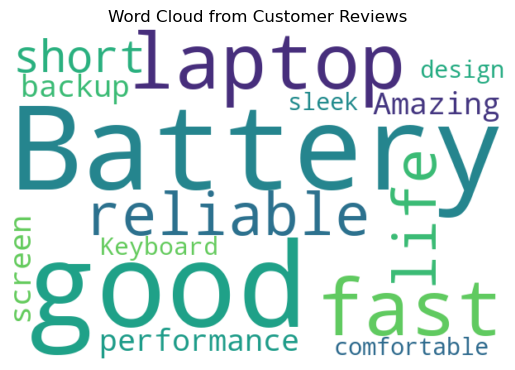

In [50]:
# Semi structured data
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of dictionaries representing semi-structured data (JSON-like reviews)
reviews = [
    {"User": "Amit", "Review": "The laptop is fast and reliable", "Rating": 5},
    {"User": "Nitin", "Review": "Battery life is short but good performance", "Rating": 4},
    {"User": "Rahul", "Review": "Amazing screen and good battery backup", "Rating": 5},
    {"User": "Priya", "Review": "Keyboard is not comfortable but design is sleek", "Rating": 3}
]

# Convert list of dictionaries into a pandas DataFrame
df_reviews = pd.DataFrame(reviews)

# Combine all review texts into one string (needed for WordCloud input)
text = " ".join(df_reviews["Review"])

# Create WordCloud object with given size and white background
wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")  # Render the word cloud image
plt.axis("off")                                 # Hide axis for a clean visualization
plt.title("Word Cloud from Customer Reviews")   # Add a title
plt.show()                                      # Show the plot




In [5]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 311.0 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 309.3 kB/s eta 0:00:00


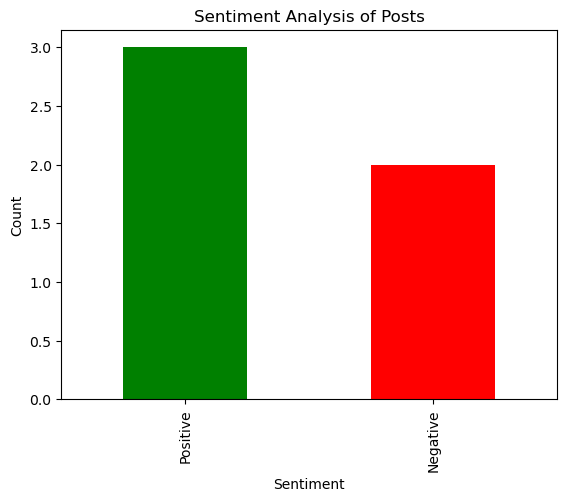

In [13]:
# Import necessary libraries
import pandas as pd                          # For handling tabular data (DataFrame)
import matplotlib.pyplot as plt              # For plotting graphs
from textblob import TextBlob                # For performing sentiment analysis

# Step 1: Create a list of unstructured text data (like social media posts / reviews)
post = [
    "I love this new phone, the camera is amazing!",        # Positive sentiment
    "The service was terrible and I am disappointed",       # Negative sentiment
    "What a great experience, I will buy again",            # Positive sentiment
    "Worst product ever, total waste of money",             # Negative sentiment
    "Decent quality but not worth the price"                # Neutral sentiment
]

# Step 2: Convert the list into a pandas DataFrame for structured analysis
df_posts = pd.DataFrame(post, columns=["Post"])  # One column named "Post" stores the text

# Step 3: Calculate polarity for each post
# Polarity ranges from -1 (very negative) to +1 (very positive)
df_posts["Polarity"] = df_posts["Post"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 4: Classify sentiment based on polarity
# If polarity > 0 → Positive
# If polarity < 0 → Negative
# If polarity = 0 → Neutral
df_posts["Sentiment"] = df_posts["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

# Step 5: Count the number of Positive, Negative, and Neutral posts
sentiments_counts = df_posts["Sentiment"].value_counts()

# Step 6: Plot the sentiment counts in a bar chart
sentiments_counts.plot(kind='bar', color=["green", "red", "blue"])
plt.title("Sentiment Analysis of Posts")  # Title of the chart
plt.xlabel("Sentiment")                   # X-axis label
plt.ylabel("Count")                       # Y-axis label
plt.show()                                # Display the bar chart


In [17]:
df_posts

,Post,Polarity,Sentiment
0,"I love this new phone, the camera is amazing!",0.462121,Positive
1,The service was terrible and I am disappointed,-0.875000,Negative
2,"What a great experience, I will buy again",0.800000,Positive
3,"Worst product ever, total waste of money",-0.400000,Negative
4,Decent quality but not worth the price,0.008333,Positive


In [19]:
sentiments_counts

Sentiment
Positive    3
Negative    2
Name: count, dtype: int64

In [ ]:
#note and short summary
# ⚙️ How does TextBlob calculate it?

# TextBlob doesn’t “think” like a human. Instead, it uses a predefined sentiment lexicon (dictionary of words with sentiment values).
# Each word in English has a polarity score in its dictionary (called PatternAnalyzer).

# Example:
# "love" → +0.5 (positive)
# "amazing" → +0.6 (positive)
# "terrible" → -0.6 (negative)
# "worst" → -1.0 (very negative)
# "money" → 0 (neutral word)

# When you give a sentence, TextBlob looks up each word’s score.
# "I love this phone" → "love" = +0.5 → overall positive.
# "The service was terrible" → "terrible" = -0.6 → overall negative.

# It averages/combines the scores of all words in the sentence.
# "Decent quality but not worth the price"
# "Decent" = +0.3
# "not worth" = -0.3

# Combined → around 0 → Neutral.

# 👉 Example with your posts:
# "I love this new phone, the camera is amazing!"
# "love" (+0.5), "amazing" (+0.6) → average positive → Polarity ≈ +0.85
# "Worst product ever, total waste of money"
# "Worst" (-1.0), "waste" (-0.7) → negative → Polarity ≈ -0.9
# "Decent quality but not worth the price"
# "Decent" (+0.3), "not worth" (-0.3) → cancel each other → Polarity ≈ 0 (Neutral)

# ✅ So in short:
# 👉 Polarity works by checking known positive/negative words in a lexicon and averaging their sentiment scores.
# That’s how TextBlob “knows” if a post is positive or negative.